# Laboratorio Nº1 - Métodos de optimización

**Autora**: Javiera Tapia Bobadilla

## Instrucciones instalación

### Instalar JuMP y GLPK
En primer lugar se agregará el paquete JuMP ejecutando el siguiente código en el Notebook (nótese que el simbolo # inicia un comentario en Julia.)

In [231]:
# import Pkg # Importa el administrador de paquetes Pkg
# Pkg.add("JuMP") # Instala el paquete JuMP

Es necesario instalar un Solver (paquete con métodos de optimización implementados, por ejemplo. Simplex). 
Se instalará el Solver open source GLPK (pueden encontrar info en https://www.gnu.org/software/glpk/) escribiendo el siguiente comando.

In [232]:
# Pkg.add("GLPK") # Instala el paquete GLPK

## Instrucciones laboratorio

Para cada problema:
- Obtenga un **modelo de programación lineal**.
- Modele el problema utilizando el lenguaje de modelado **JuMP**.
- Utilice los comentarios para explicar el modelo obtenido.
- Obtenga la solución del problema mediante el **Solver GLPK**.
- Para todos los modelos explicite el **valor objetivo óptimo** y el **valor óptimo de las variables de decisión**.

## Problemas

### Problema 1: Selección de portafolio.

Un consultor en finanzas requiere elegir para uno de sus clientes un conjunto de acciones
en las cuales invertir. El cliente desea invertir € 100.000 en 6 diferentes acciones. El consultor
estima el retorno sobre la inversión (ROI) que el cliente puede obtener en un período de seis
meses. La tabla nro. 1 muestra para cada acción, su país de origen, la categoría (T: tecnológicas, N:
no tecnológicas) y el ROI esperado.


<center>Tabla 1: origen, categoría y retorno de las acciones. </center>

| Acción 	| Origen      	| Categoría 	| ROI  	|
|--------	|-------------	|-----------	|------	|
| 1      	| Japón       	| T         	| 5.3% 	|
| 2      	| Reino Unido 	| T         	| 6.2% 	|
| 3      	| Francia     	| T         	| 5.1% 	|
| 4      	| USA         	| N         	| 4.9% 	|
| 5      	| Alemania    	| N         	| 6.5% 	|
| 6      	| Francia     	| N         	| 3.4% 	|

El cliente especifica ciertas restricciones. Pide invertir al menos 5.000 € y como máximo €
40,000 en cada una de las acciones. Además, desea invertir al menos la mitad de su capital en
acciones europeas y como mucho 30% en acciones tecnológicas.\
**¿Cómo debe dividirse el capital entre las acciones para obtener el mayor ROI?**

### Desarrollo

In [233]:
# Módulos
using JuMP # Importa el modulo JuMP.
using GLPK # Importa el modulo GLPK para utilizar el solver.

# Construcción del modelo
# Modelo asociado a un solver
modeloUno = Model(with_optimizer(GLPK.Optimizer))

# VARIABLES DE DECISIÓN
@variable(modeloUno, x[1:6] >= 0) # Monto de dinero invertido en acción i, con i = 1,...,6

# FUNCIÓN OBJECTIVO
# Maximizar ROI de cada acción
@objective(modeloUno, Max, (5.3/100)x[1] + (6.2/100)x[2] + (5.1/100)x[3] + (4.9/100)x[4] + (6.5/100)x[5] + (3.4/100)x[6])

# RESTRICCIONES
# Restricciones de inversión mínimo y máximo en cada acción
for i in 1:6
    @constraint(modeloUno, 5000 <= x[i] <= 40000)
end

# Restricciones de inversión tecnológicas y no tecnológicas
@constraint(modeloUno, sum(x[1:3]) <= 30000)
@constraint(modeloUno, sum(x[2:3]) + sum(x[5:6]) >= 50000)

# Restricción monto máximo de inversión
@constraint(modeloUno, sum(x[1:6]) <= 100000)

# Resuelve el  modelo
optimize!(modeloUno)

# Entrega el valor objetivo óptimo
println("Valor objetivo óptimo: ", objective_value(modeloUno))

for i in 1:6
    println("Acción ", i, ": ", value(x[i]))
end

Valor objetivo óptimo: 5755.0
Acción 1: 5000.0
Acción 2: 20000.0
Acción 3: 5000.0
Acción 4: 25000.0
Acción 5: 40000.0
Acción 6: 5000.0


In [234]:
# Entrega el valor de estado de término del modelo.
# 1 = Óptimo; 2 = Infactible
termination_status(modeloUno)

OPTIMAL::TerminationStatusCode = 1

### Problema 2: Producción de aleaciones.

Una empresa siderúrgica ha recibido un pedido de 500 toneladas de acero destinado a la
construcción naval. El acero, debe cumplir con los siguientes requisitos porcentuales en su
composición:

<center>Tabla 2: Requisitos porcentuales.</center>

| Elemento químico 	| Mínimo Porcentual (%)  | Máximo Porcentual (%)
|-----------------	|----------------------	 |----------------------
| Carbón (C)     	| 2            	         | 3         	
| Cobre (Cu)      	| 0.4 	                 | 0.6         	
| Manganeso (Mn)    | 1.2     	             | 1.65

La empresa cuenta con siete materias primas diferentes en stock que pueden ser utilizadas
para la producción del acero. En tabla nro. 3 se enumeran los porcentajes, las cantidades
disponibles y los precios de todas las materias primas:

<center>Tabla 3: Materias prima y costos.</center>

| Materia prima     | C %  | Cu % | Mn % | Disponibilidad en t | Costo en €/t
|-----------------  |----- |----- | ---- | ------------------- | ------------
| Hierro 1          | 2.5  | 0    | 1.3  | 400                 | 200
| Hierro 2          | 3    | 0    | 0.8  | 300                 | 250
| Hierro 3          | 0    | 0.3  | 0    | 600                 | 150
| Cobre 1           | 0    | 90   | 0    | 500                 | 220
| Cobre 2           | 0    | 96   | 4    | 200                 | 240
| Aluminio 1        | 0    | 0.4  | 1.2  | 300                 | 200
| Aluminio 2        | 0    | 0.6  | 0    | 250                 | 165

El objetivo es **determinar la composición de la aleación de acero que minimice el costo de
producción.**

### Desarrollo

In [235]:
# Módulos
using JuMP # Importa el modulo JuMP.
using GLPK # Importa el modulo GLPK para utilizar el solver.

# Construcción del modelo
# Modelo asociado a un solver
modeloDos = Model(with_optimizer(GLPK.Optimizer))

# VARIABLES DE DECISIÓN
@variable(modeloDos, x[1:7] >= 0) # Cantidad de materia prima utilizada en la aleación con i = 1,...,7

# FUNCIÓN OBJECTIVO
# Minimizar costo de producción
@objective(modeloDos, Min, 200x[1] + 250x[2] + 150x[3] + 220x[4] + 240x[5] + 200x[6] +165x[7])


# RESTRICCIONES
sumaMateriasPrimas = sum(x[1:7])

# Restricciones de mínimos porcentuales
@constraint(modeloDos, 0.025x[1] + 0.03x[2] >= 0.02*sumaMateriasPrimas)
@constraint(modeloDos, 0.003x[3] + 0.9x[4] + 0.96x[5] + 0.004x[6] + 0.006x[7] >= 0.004*sumaMateriasPrimas)
@constraint(modeloDos, 0.013x[1] + 0.008x[2] + 0.04x[5] + 0.012x[6] >= 0.012*sumaMateriasPrimas)

# Restricciones de máximos porcentuales
@constraint(modeloDos, 0.025x[1] + 0.003x[2] <= 0.03*sumaMateriasPrimas)
@constraint(modeloDos, 0.003x[3] + 0.9x[4] + 0.96x[5] + 0.004x[6] + 0.006x[7] <= 0.006*sumaMateriasPrimas)
@constraint(modeloDos, 0.013x[2] + 0.008x[2] + 0.004x[5] + 0.012x[6] <= 0.0165*sumaMateriasPrimas)

# Restricciones de disponibilidad
@constraint(modeloDos, 0 <= x[1] <= 400)
@constraint(modeloDos, 0 <= x[2] <= 300)
@constraint(modeloDos, 0 <= x[3] <= 600)
@constraint(modeloDos, 0 <= x[4] <= 500)
@constraint(modeloDos, 0 <= x[5] <= 200)
@constraint(modeloDos, 0 <= x[6] <= 300)
@constraint(modeloDos, 0 <= x[7] <= 250)

# Restricción de demanda
@constraint(modeloDos, sumaMateriasPrimas >= 500)

# Resuelve el  modelo
optimize!(modeloDos)

# Entrega el valor objetivo óptimo
println("Valor objetivo óptimo: ", objective_value(modeloDos))
println("Hierro 1: ", value(x[1]), "t")
println("Hierro 2: ", value(x[2]), "t")
println("Hierro 3: ", value(x[3]), "t")
println("Cobre 1: ",  value(x[4]), "t")
println("Cobre 2: ",  value(x[5]), "t")
println("Alumnio 1: ", value(x[6]), "t")
println("Alumnio 2: ", value(x[7]), "t")

Valor objetivo óptimo: 98121.63579168121
Hierro 1: 400.0t
Hierro 2: 0.0t
Hierro 3: 39.77630199231031t
Cobre 1: 0.0t
Cobre 2: 2.7612722824187337t
Alumnio 1: 57.46242572527082t
Alumnio 2: 0.0t


In [236]:
# Entrega el valor de estado de término del modelo.
# 1 = Óptimo; 2 = Infactible
termination_status(modeloUno)

OPTIMAL::TerminationStatusCode = 1

### Problema 3: Problema de planificación

Se prospecta una mina de uranio a cielo abierto. Sobre la base de los resultados de
algunas perforaciones de prueba, la mina se ha subdividido en unidades de explotación
denominadas bloques. Las excavaciones se deben realizar en forma aterrazada, con el fin de
permitir la circulación de los camiones. El yacimiento se extiende de este a oeste, viéndose
limitada por un pueblo y por un conjunto montañoso. Considerando estas limitaciones, se han
identificado 18 bloques de 10.000 toneladas distribuidos en tres niveles. Para extraer un bloque,
es necesario antes extraer tres bloques del nivel inmediatamente superior, siendo éstos, el bloque
superior y los ubicados a la derecha y a la izquierda de este. Ejemplo: Para extraer el bloque 16,
antes se deben extraer los bloques 10, 11 y 12. 

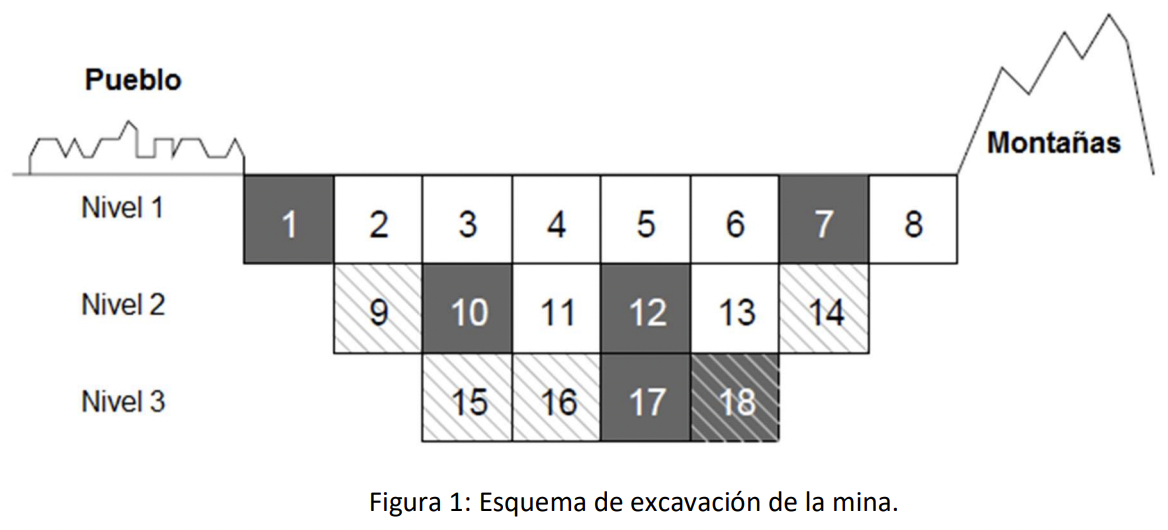

Extraer un bloque del nivel 1 tiene un costo de € 100 por tonelada, para un bloque del
nivel 2 el costo es de € 200 por tonelada y de € 300 por tonelada para un bloque del nivel 3, con
excepción de los bloques achurados, los que debido a su riqueza en cuarzo, presentan una roca
más dura, elevando su costo de extracción a € 1000 por tonelada.\
Los únicos bloques que contienen uranio son los que aparecen en un gris (1, 7, 10, 12, 17 y 18), siendo sus valores de
mercado de 200, 300, 500, 200, 1000 y € 1200 por tonelada, respectivamente. El bloque 18,
aunque rico en mineral, es de composición dura, tal como los otros bloques achurados. **¿Qué
bloques se debiesen extraer para maximizar el beneficio total?**

### Desarrollo

In [435]:
# Módulos
using JuMP # Importa el modulo JuMP.
using GLPK # Importa el modulo GLPK para utilizar el solver.

# Construcción  del modelo
# Modelo asociado a un solver
modeloTres = Model(with_optimizer(GLPK.Optimizer))

# PARÁMETROS DEL PROBLEMA
# Costos
c = [100*10000; 100*10000; 100*10000; 100*10000; 100*10000; 100*10000; 100*10000; 100*10000;
     1000*10000; 200*10000; 200*10000; 200*10000; 200*10000; 1000*10000;
     1000*10000; 1000*10000; 300*10000; 1000*10000]

# Valor
b = [200*10000; 0; 0; 0; 0; 0; 300*10000; 0;
     0; 50*100000; 0; 200*10000; 0; 0; 
     0; 0; 1000*10000; 1200*10000]

# Construcción de pares ordenados
A = []

for i in 9:14
    push!(A, [i,i-8])
    push!(A, [i,i-7])
    push!(A, [i,i-6])
end
    
for i in 14:18
    push!(A, [i,i-6])
    push!(A, [i,i-5])
    push!(A, [i,i-4])
end

# VARIABLES DE DECISIÓN BINARIAS
# 0 = No se extrae el bloque
# 1 = Se extrae el bloque
@variable(modeloTres, x[1:18], Bin)

# FUNCIÓN OBJETIVO
@objective(modeloTres, Max, sum((b[i]-c[i])*x[i] for i in 1:18))

# RESTRICCIONES

# Restricciones de toneladas
@constraint(modeloTres, sum(x[1:18]) <= 10000)

# Restricciones de precedencia
for (index, edge) in enumerate(A)
    u = edge[1]
    v = edge[2]
    @constraint(modeloTres, x[u] <= x[v])
end
    
# Resuelve el  modelo
optimize!(modeloTres)

# Entrega el valor objetivo óptimo
println("Valor objetivo óptimo: ", objective_value(modeloTres))

for i in 1:18
    println("Bloque ",i,": ", value(x[i]))
end

Valor objetivo óptimo: 4.0e6
Bloque 1: 1.0
Bloque 2: 1.0
Bloque 3: 1.0
Bloque 4: 1.0
Bloque 5: 1.0
Bloque 6: 1.0
Bloque 7: 1.0
Bloque 8: 0.0
Bloque 9: 0.0
Bloque 10: 1.0
Bloque 11: 1.0
Bloque 12: 1.0
Bloque 13: 1.0
Bloque 14: 0.0
Bloque 15: 0.0
Bloque 16: 0.0
Bloque 17: 1.0
Bloque 18: 0.0


In [433]:
# Entrega el valor de estado de término del modelo.
# 1 = Óptimo; 2 = Infactible
termination_status(modeloUno)

OPTIMAL::TerminationStatusCode = 1

### Problema 4: Problema de programación

Un departamento de informática de una pequeña universidad se encuentra programando
los exámenes finales que deberán ser rendidos por diferentes grupos de estudiantes. La principal
condición en la confección del calendario es que todos los grupos de alumnos puedan rendir sus
exámenes sin traslapes de horario. Los siete exámenes que se deben programar se han etiquetado
desde ID1 hasta ID7. La tabla nro. 4 relaciona los exámenes que presentan a lo menos un alumno
en común en sus nóminas. **¿Cuál es el calendario de exámenes que minimiza el número de
períodos de tiempo utilizados?**

<center>Tabla 4: Conflictos en exámenes.</center>

| ID1 – ID2  | ID1 – ID3  | ID1 – ID4   | ID1 – ID7  |
| ---------- | ---------  | ---------   | ---------- |
| ID2 – ID3  | ID2 – ID4  | ID2 – ID5   | ID2 – ID7  |
| ID3 – ID4  | ID3 – ID6  | ID3 – ID7   |
| ID4 – ID5  | ID4 – ID6  
| ID5 – ID6  | ID5 – ID7 
| ID6 – ID7  |

### Desarrollo

In [437]:
# Módulos
using JuMP # Importa el modulo JuMP.
using GLPK # Importa el modulo GLPK para utilizar el solver.

# Construcción  del modelo
# Modelo asociado a un solver
modeloTres = Model(with_optimizer(GLPK.Optimizer))

# TODO

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK